In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 64
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1048 		 0.1 		 0.1 |
| 1029 		 0.1 		 0.1 |
| 1024 		 0.1 		 0.1 |
| 1041 		 0.1 		 0.1 |
| 1070 		 0.1 		 0.1 |
| 1044 		 0.1 		 0.1 |
| 1147 		 0.1 		 0.1 |
| 1052 		 0.1 		 0.1 |
| 1351 		 0.1 		 0.1 |
| 1319 		 0.1 		 0.1 |
| 1073 		 0.1 		 0.1 |
| 1218 		 0.1 		 0.1 |
| 1006 		 0.1 		 0.1 |
| 1041 		 0.1 		 0.1 |
| 1119 		 0.1 		 0.1 |
| 1006 		 0.1 		 0.1 |
| 1013 		 0.1 		 0.1 |
| 1139 		 0.1 		 0.1 |
| 1101 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 101.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1100
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


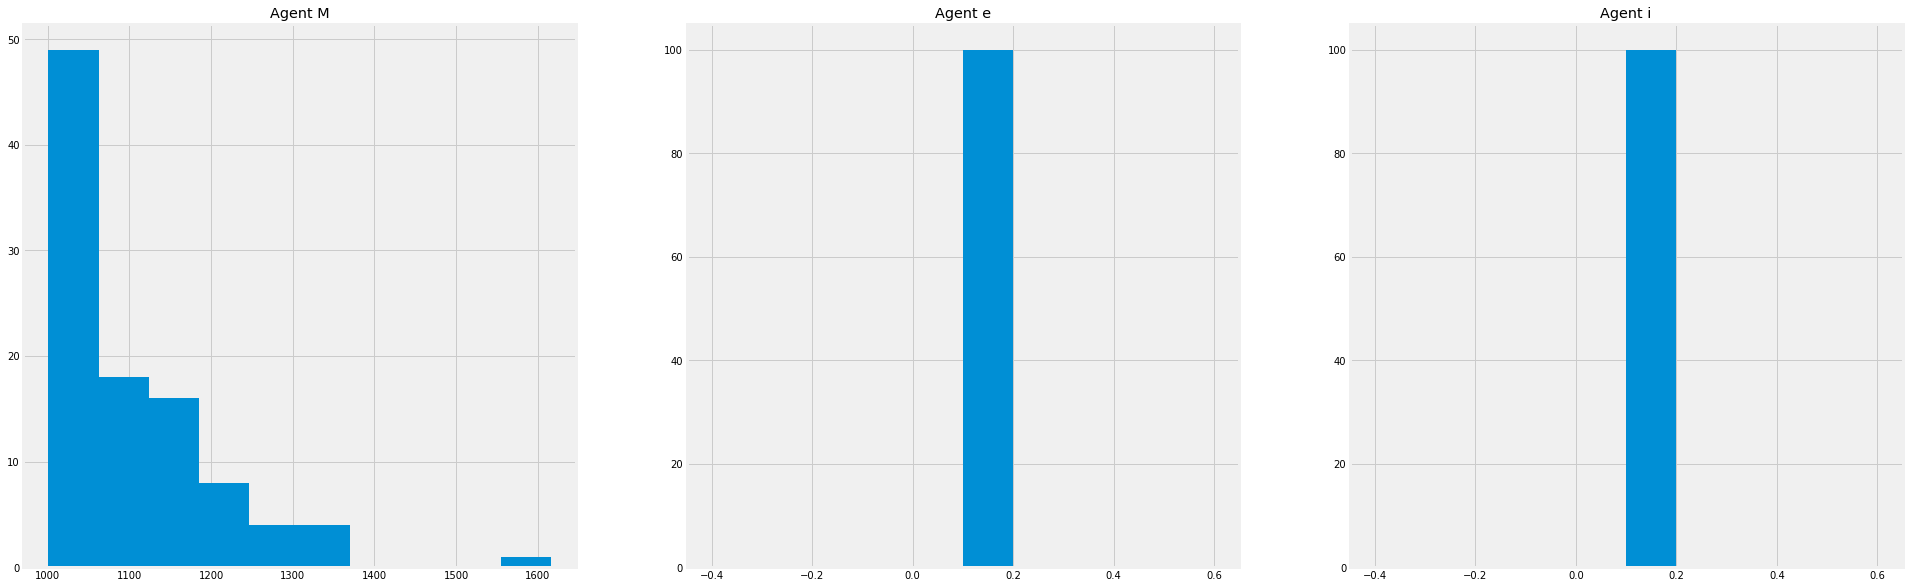

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 93.0, Temptation: 103.0, Sucker: -10.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 94.0, Temptation: 105.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 92.0, Temptation: 102.0, Sucker: -10.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 94.0, Temptation: 105.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 94.0, Temptation: 104.0, Sucker: -10.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 94.0, Temptation: 105.0, Su

In [2]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = ["power",1000, 10]
E = [0.1, 1/10000]
I = [0.1, 1/10000]
power_distance = [M,E,I]

agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 43 minutes.
    S.D.  Counts Seed
0    0.5     276   64
1    0.6     259   64
2    0.7     255   64
3    0.8     231   64
4    0.9     209   64
5    1.0     188   64
6    1.1     189   64
7    1.2     172   64
8    1.3     165   64
9    1.4     147   64
10   1.5     128   64
11   1.6     103   64
12   1.7      78   64
13   1.8      51   64
14   1.9      51   64
15   2.0      36   64
16   2.1      27   64
17   2.2      15   64
18   2.3      12   64
19   2.4       7   64
20   2.5       7   64
21   2.6       5   64
22   2.7       4   64
23   2.8       5   64
24   2.9       3   64
25   3.0       1   64


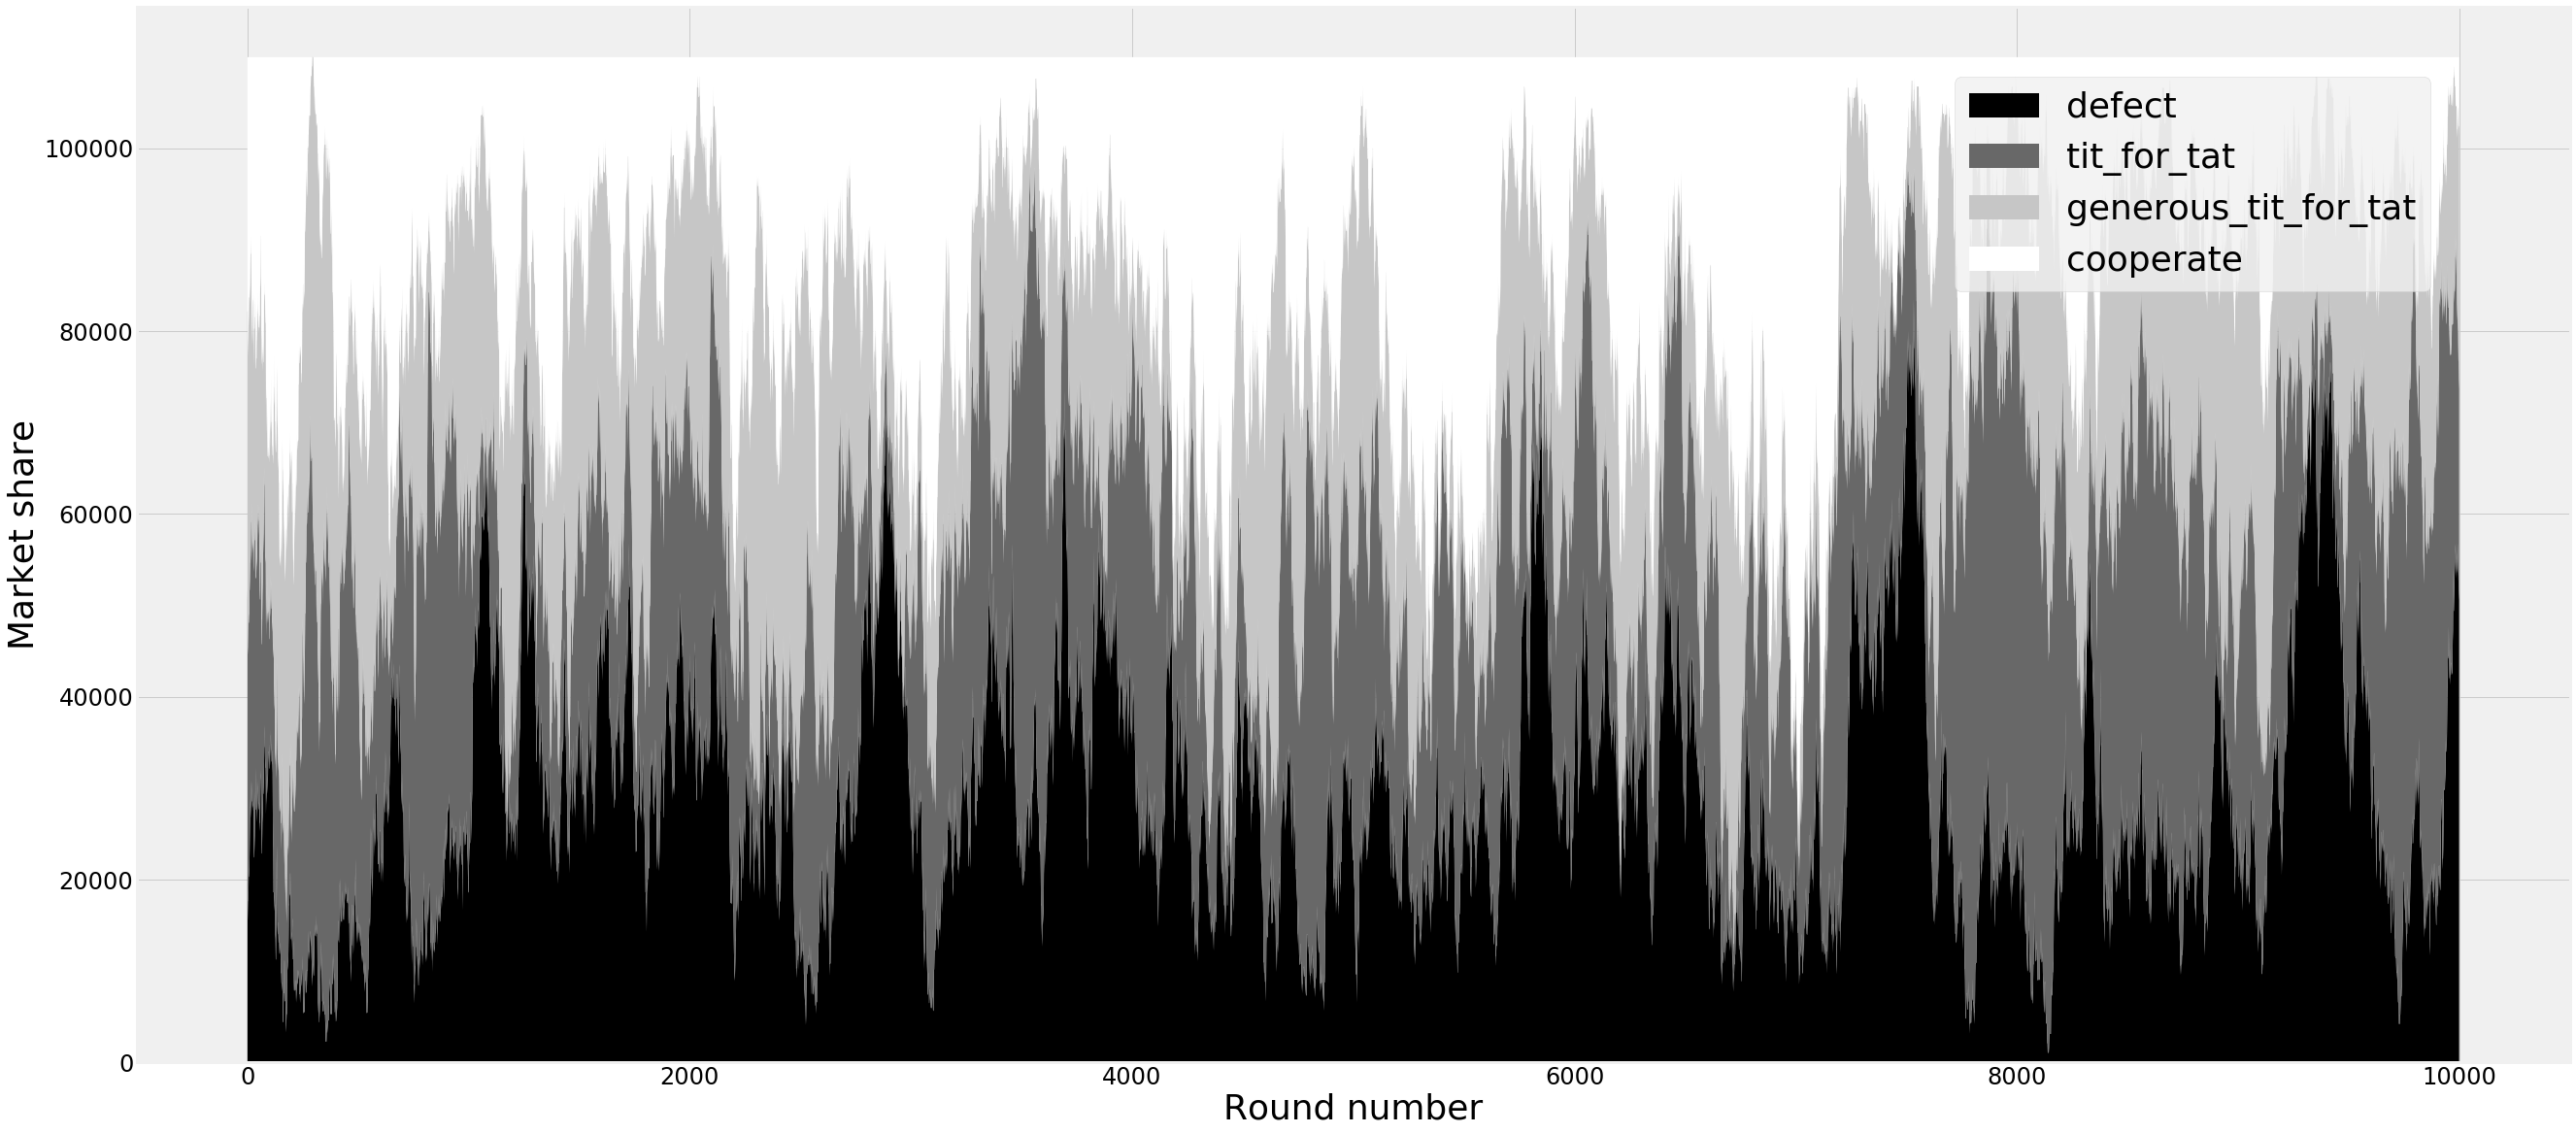

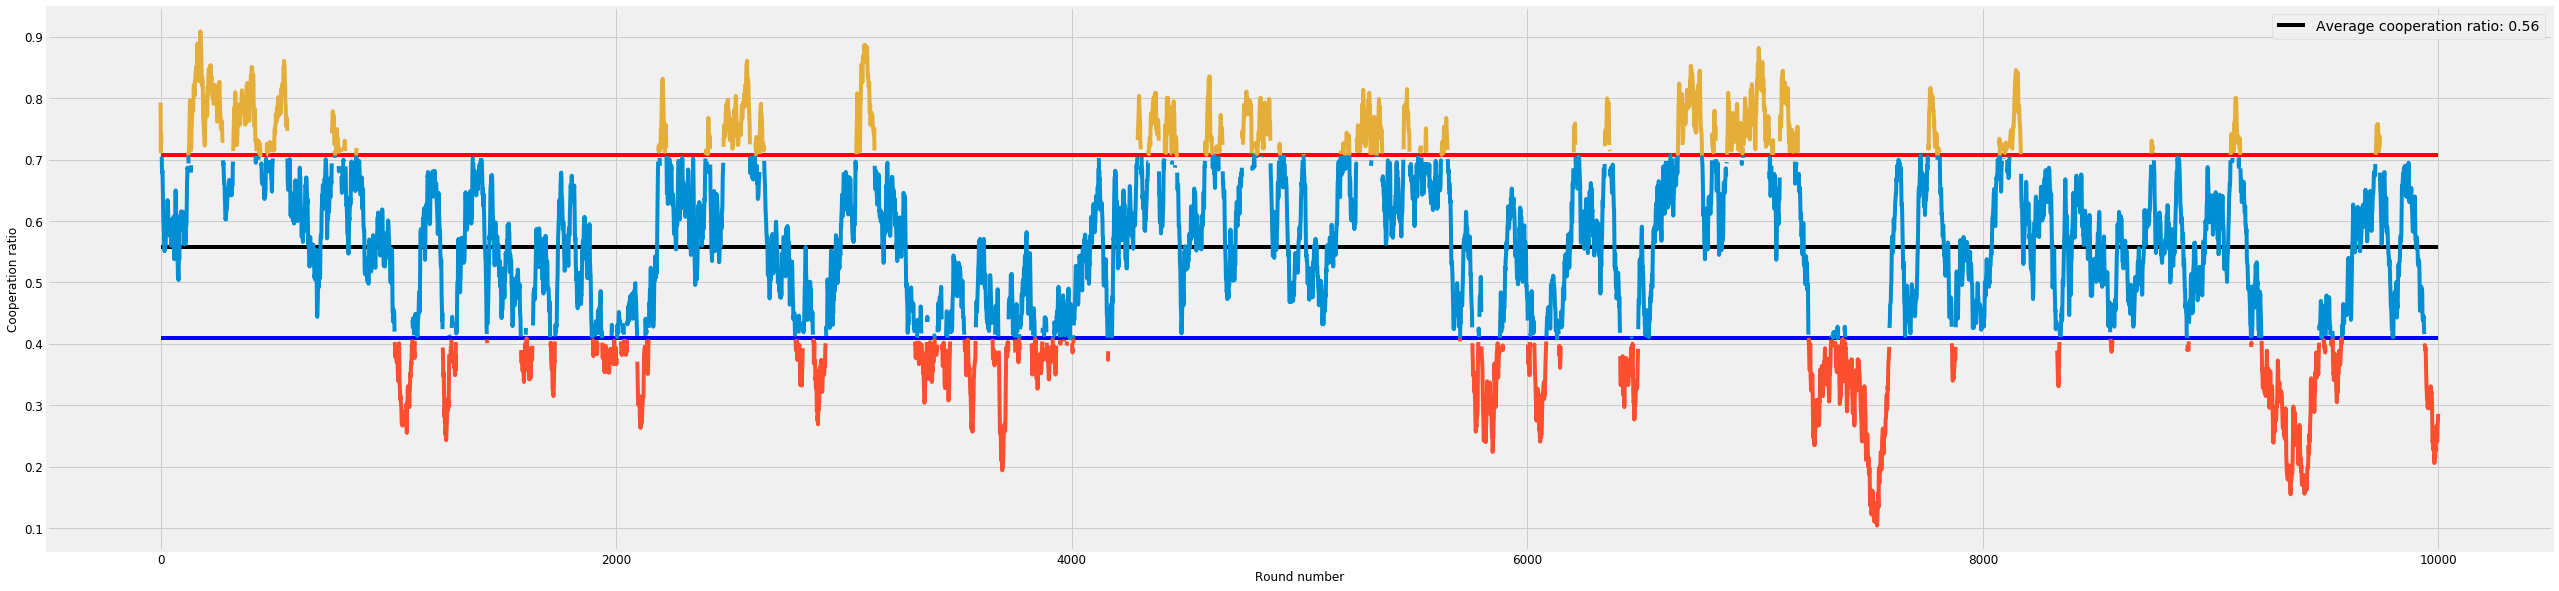

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_power_law_M", seed = str(seed))